In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 1. Quarterly Compustat Firm Characteristics
chunk_size = 100_000
path = 'CompFirmCharac.csv'

# Initialisation
total_rows = 0
null_sums = None
dtypes_collected = None

# Lecture par morceaux
for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):
    print(f"Processing chunk {i+1}")

    # Compte des lignes
    total_rows += len(chunk)

    # Comptage des valeurs manquantes
    chunk_nulls = chunk.isnull().sum()

    if null_sums is None:
        null_sums = chunk_nulls
    else:
        null_sums += chunk_nulls

    # Collecte des dtypes (seulement une fois)
    if dtypes_collected is None:
        dtypes_collected = chunk.dtypes

# Résumé final
print("\n=== Résumé EDA (par chunks) ===")
print(f"Nombre total de lignes : {total_rows}")
print("\nValeurs manquantes (top 10) :")
print((null_sums / total_rows).sort_values(ascending=False).head(10))
print("\nTypes de colonnes :")
print(dtypes_collected.value_counts())


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3804018054.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):


Processing chunk 1


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3804018054.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):


Processing chunk 2


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3804018054.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):


Processing chunk 3


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3804018054.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):


Processing chunk 4


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3804018054.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):


Processing chunk 5


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3804018054.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):


Processing chunk 6


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3804018054.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):


Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Processing chunk 16
Processing chunk 17
Processing chunk 18
Processing chunk 19
Processing chunk 20
Processing chunk 21

=== Résumé EDA (par chunks) ===
Nombre total de lignes : 2052014

Valeurs manquantes (top 10) :
ustdncy     0.999998
unwccy      0.999998
uwkcapcy    0.999998
utfoscy     0.999996
tsafcy      0.999996
ufretsdy    0.999996
utfdocy     0.999996
arceepsy    0.999832
arcedy      0.999832
arcey       0.999826
dtype: float64

Types de colonnes :
float64    239
object      13
int64        4
Name: count, dtype: int64


In [6]:
# Étape 2 : identifier les colonnes à supprimer
columns_to_drop = (null_sums / total_rows)[(null_sums / total_rows) > 0.99].index.tolist()
print(f"{len(columns_to_drop)} colonnes seront supprimées (trop de NaNs)")

output_path = 'CompFirmCharac_cleaned.csv'

# Étape 3 : lire à nouveau et écrire le CSV nettoyé
first_chunk = True
for chunk in pd.read_csv(path, chunksize=chunk_size):
    chunk = chunk.drop(columns=columns_to_drop)

    # Sauvegarder par append
    chunk.to_csv(output_path, index=False, mode='w' if first_chunk else 'a', header=first_chunk)
    first_chunk = False

print(f"CSV nettoyé sauvegardé sous : {output_path}")

28 colonnes seront supprimées (trop de NaNs)


/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/2745984033.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=chunk_size):
/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/2745984033.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=chunk_size):
/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/2745984033.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=chunk_size):
/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/2745984033.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=chunk_size):
/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000

CSV nettoyé sauvegardé sous : CompFirmCharac_cleaned.csv


=== Aperçu du dataset nettoyé ===
Lignes : 2052014, Colonnes : 228

Types de données :
float64    212
object      13
int64        3
Name: count, dtype: int64

Top 10 colonnes avec le plus de NaNs :
pdvcy        0.989758
dprety       0.989375
tdcy         0.988789
srety        0.988772
nrtxtepsy    0.988048
prstkccy     0.987903
depcy        0.987828
uaolochy     0.987792
uoisy        0.987788
cdvcy        0.987627
dtype: float64


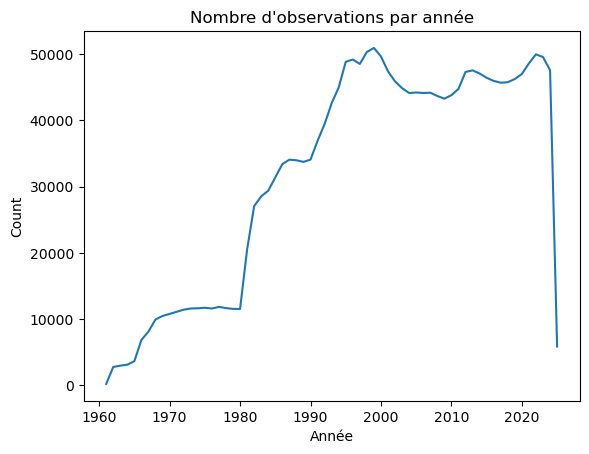

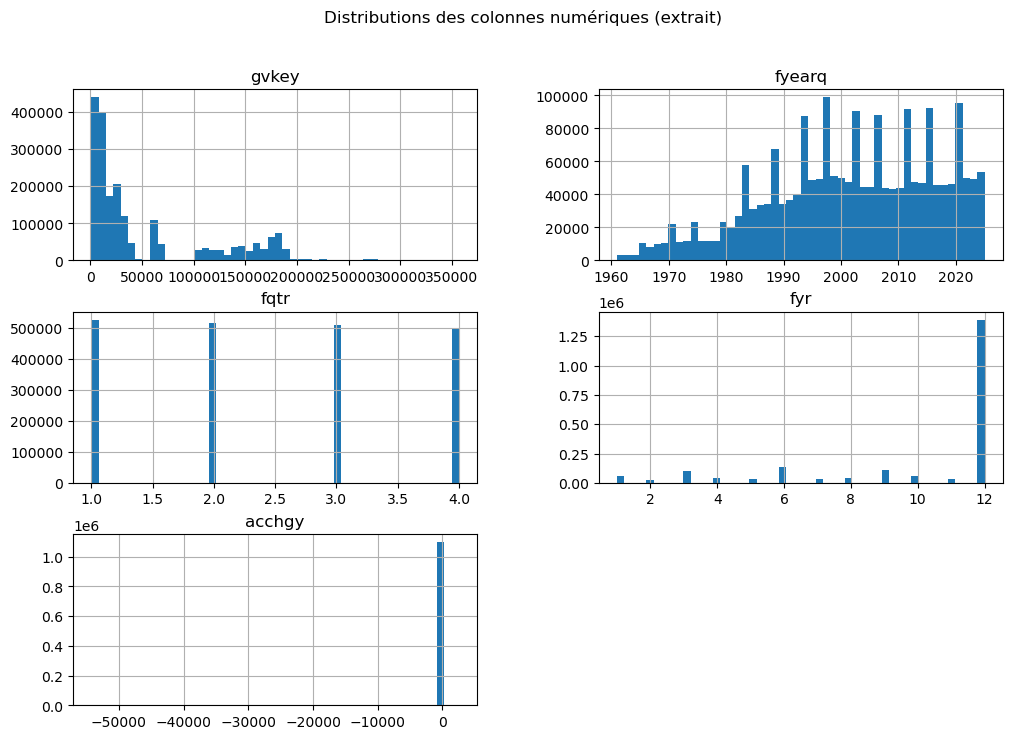

In [7]:
df = pd.read_csv('CompFirmCharac_cleaned.csv', low_memory=False)

# Aperçu général
print("=== Aperçu du dataset nettoyé ===")
print(f"Lignes : {df.shape[0]}, Colonnes : {df.shape[1]}")
print("\nTypes de données :")
print(df.dtypes.value_counts())

# Valeurs manquantes (top 10)
print("\nTop 10 colonnes avec le plus de NaNs :")
print(df.isnull().mean().sort_values(ascending=False).head(10))

# Distribution temporelle si colonne 'datadate' existe
if 'datadate' in df.columns:
    df['datadate'] = pd.to_datetime(df['datadate'], errors='coerce')
    df['datadate'].dt.year.value_counts().sort_index().plot()
    plt.title("Nombre d'observations par année")
    plt.xlabel("Année")
    plt.ylabel("Count")
    plt.show()

# Histogrammes de colonnes numériques (exemple)
num_cols = df.select_dtypes(include='number').columns[:5]  # les 5 premières
df[num_cols].hist(bins=50, figsize=(12, 8))
plt.suptitle("Distributions des colonnes numériques (extrait)")
plt.show()

In [ ]:
df = df.loc[:, df.isnull().mean() < 0.90]  

# Garder seulement les colonnes numériques
num_df = df.select_dtypes(include='number')

# Supprimer les colonnes avec trop peu de variance
num_df = num_df.loc[:, num_df.std() > 1e-6]

# Corrélation absolue
corr = num_df.corr().abs()

# Récupérer les paires corrélées fortement (hors diagonale)
high_corr = (
    corr.where(~np.eye(corr.shape[0], dtype=bool))

    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Var1', 'level_1': 'Var2', 0: 'Correlation'})
)

# Filtrer les corrélations élevées
strong_corr = high_corr[high_corr['Correlation'] > 0.8].sort_values(by='Correlation', ascending=False)

print("\nPaires de variables corrélées (> 0.8) :")
print(strong_corr.head(20))  # affiche les 20 plus corrélées


🔗 Paires de variables corrélées (> 0.8) :
            Var1       Var2  Correlation
10577      saley      revty     1.000000
10455      revty      saley     1.000000
14266   xoptepsy     xoptdy     1.000000
14023     xoptdy   xoptepsy     1.000000
10825    spcedpy  spceepspy     1.000000
11068  spceepspy    spcedpy     1.000000
11191   spceepsy     spcedy     1.000000
10948     spcedy   spceepsy     1.000000
4183      epsfxy     epspxy     0.999999
4426      epspxy     epsfxy     0.999999
8487      pncpdy   pncpepsy     0.999997
8609    pncpepsy     pncpdy     0.999997
10946     spcedy    spcedpy     0.999993
10824    spcedpy     spcedy     0.999993
11192   spceepsy  spceepspy     0.999993
11070  spceepspy   spceepsy     0.999993
10947     spcedy  spceepspy     0.999992
11069  spceepspy     spcedy     0.999992
11190   spceepsy    spcedpy     0.999992
10826    spcedpy   spceepsy     0.999992


In [13]:
# Liste des variables déjà marquées pour suppression
to_drop = set()

for _, row in strong_corr.iterrows():
    if row['Var1'] not in to_drop and row['Var2'] not in to_drop:
        to_drop.add(row['Var2'])  # on garde Var1 et on vire Var2

print(f"{len(to_drop)} colonnes à supprimer pour redondance > 0.8")

df_reduced = num_df.drop(columns=list(to_drop))



46 colonnes à supprimer pour redondance > 0.8


In [ ]:
non_num = df.select_dtypes(exclude='number')
df_final = pd.concat([df_reduced, non_num], axis=1)
# Delete rows with too many NaNs
row_threshold = 0.8
df_final = df_final[df_final.isnull().mean(axis=1) < row_threshold]


In [20]:
df_final.to_csv('CompFirmCharac_final.csv', index=False)


In [22]:
# 2. Jensen, Kelly, and Pedersen (JKP) factors
jkpfactors = pd.read_csv('[usa]_[all_factors]_[monthly]_[vw_cap].csv')

In [23]:
print(jkpfactors.dtypes)
print(jkpfactors.head())

location         object
name             object
freq             object
weighting        object
direction         int64
n_stocks          int64
n_stocks_min      int64
date             object
ret             float64
dtype: object
  location name     freq weighting  direction  n_stocks  n_stocks_min  \
0      usa  age  monthly    vw_cap         -1       502             8   
1      usa  age  monthly    vw_cap         -1       505            12   
2      usa  age  monthly    vw_cap         -1       510            17   
3      usa  age  monthly    vw_cap         -1       512            21   
4      usa  age  monthly    vw_cap         -1       503            23   

         date       ret  
0  1926-03-31 -0.086738  
1  1926-04-30 -0.000572  
2  1926-05-31 -0.006332  
3  1926-06-30 -0.003012  
4  1926-07-31  0.003211  


In [25]:
jkpfactors['date'] = pd.to_datetime(jkpfactors['date'], errors='coerce')

# Keep only necessary columns
jkpfactors = jkpfactors[['date', 'name', 'ret']]

# Drop rows with missing values
jkpfactors = jkpfactors.dropna()

# Pivot to wide format: one column per factor
jkpfactors_wide = jkpfactors.pivot(index='date', columns='name', values='ret')

# Sort by date
jkpfactors_wide = jkpfactors_wide.sort_index()

# Drop factors with too many NaNs (>5%)
jkpfactors_wide = jkpfactors_wide.dropna(axis=1, thresh=0.95 * len(jkpfactors_wide))

# Forward-fill missing returns (optional)
jkpfactors_wide = jkpfactors_wide.fillna(method='ffill')

# Save cleaned version
jkpfactors_wide.to_csv("JKP_cleaned.csv")

/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/3401262906.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  jkpfactors_wide = jkpfactors_wide.fillna(method='ffill')


In [26]:
# 3. Chen-Zimmerman data

chenzim = pd.read_csv('PredictorLSretWide-feds-2021037.csv')

In [32]:
chenzim['date'] = pd.to_datetime(chenzim['date'], errors='coerce')
chenzim = chenzim.sort_values(by='date')
chenzim = chenzim.set_index('date')
chenzim = chenzim.dropna(axis=1, thresh=0.95 * len(chenzim))
chenzim = chenzim.fillna(method='ffill')
chenzim.to_csv('ChenZimmerman_cleaned.csv')

/var/folders/fn/4xlpvr555jx0gt6033j7x9lr0000gn/T/ipykernel_37107/1383606179.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chenzim = chenzim.fillna(method='ffill')


In [33]:
# 4. 10K reports 

reports = pd.read_parquet('mda_text.parquet')

In [34]:
reports.head()

,submission_type,filing_date,report_date,report_year,cik,company_conformed_name,text
0,10-K,20160311,20151231,2015,0000002178,"ADAMS RESOURCES & ENERGY, INC.",Item 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...
1,10-K,20160218,20151226,2015,0000002488,ADVANCED MICRO DEVICES INC,ITEM 7.\n\nMANAGEMENT'S DISCUSSION AND ANALYSI...
2,10-K,20160216,20151231,2015,0000003499,ALEXANDERS INC,ITEM 7. management's discussion and analys...
3,10-K,20151210,20150930,2015,0000003545,ALICO INC,Item 7. Management's Discussion and Analysis o...
4,10-K,20161206,20160930,2016,0000003545,ALICO INC,Item 7. Management's Discussion and Analysis o...


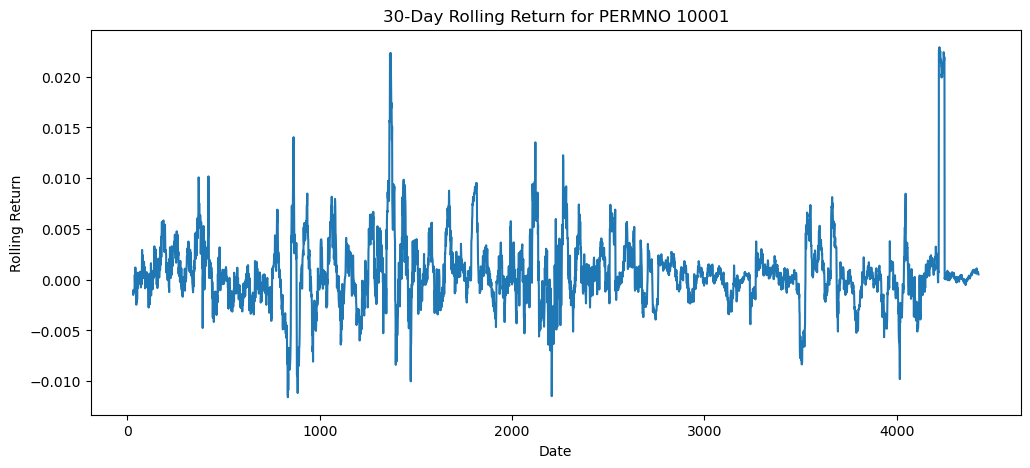

In [39]:
# 5. daily crsp returns

# Load a sample of daily CRSP
df = pd.read_csv('daily_crsp.csv', nrows=500_000)
df['DlyCalDt'] = pd.to_datetime(df['DlyCalDt'], errors='coerce')

# Filter to one stock (e.g. PERMNO 10001)
stock_df = df[df['PERMNO'] == 10001].sort_values('DlyCalDt')

# Plot rolling average return
stock_df['DlyRet'].rolling(30).mean().plot(figsize=(12, 5), title='30-Day Rolling Return for PERMNO 10001')
plt.xlabel("Date")
plt.ylabel("Rolling Return")
plt.show()